In [4]:
from helpers import *

pos_area = pd.read_csv('data_copulas/bloom_results_density_0.5_1.csv', index_col=0, parse_dates=True)
neg_area = pd.read_csv('data_copulas/bloom_results_density_0_0.5.csv', index_col=0, parse_dates=True)

upside_ratio = pd.DataFrame(index=pos_area.index, columns=pos_area.columns)

for i in range(len(pos_area)):
    for j in range(len(pos_area.columns)):
        if pos_area.iloc[i, j] == 0:
            upside_ratio.iloc[i, j] = 0
        else:
            upside_ratio.iloc[i, j] = pos_area.iloc[i, j] / neg_area.iloc[i, j]

upside_ratio = upside_ratio.replace(0, np.nan)

#upside_ratio.to_excel('data_copulas/bloom_Factor_UpsideRatio.xlsx') 

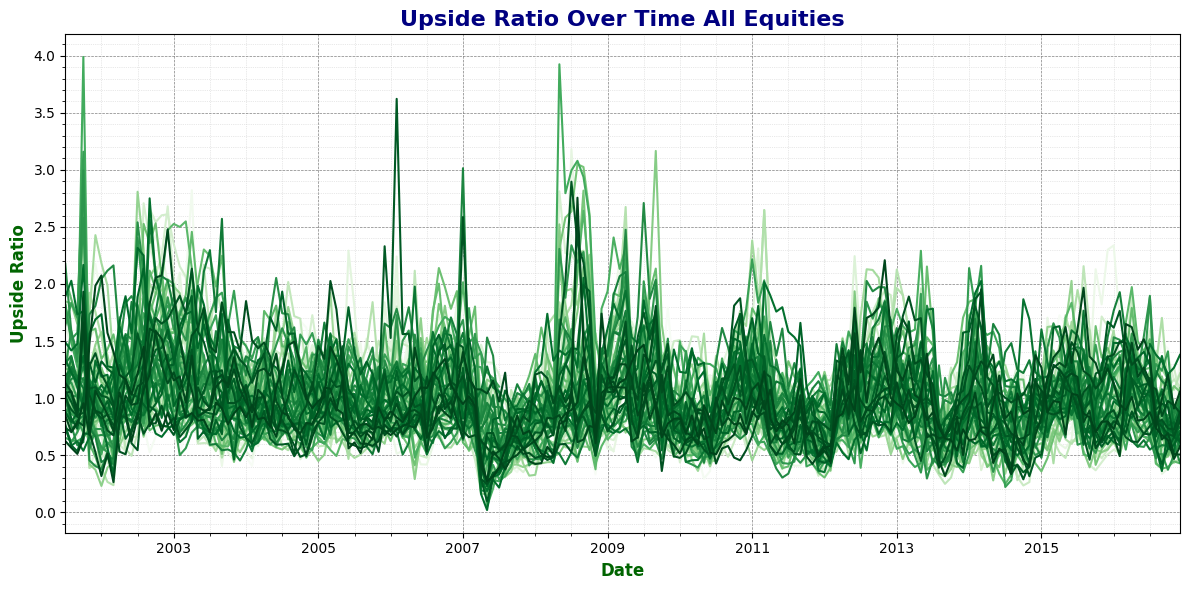

In [5]:

fig, ax = plt.subplots(figsize=(12, 6))
colors = cm.Greens(np.linspace(0, 1, len(upside_ratio.columns)))

for i, column in enumerate(upside_ratio.columns):
    upside_ratio[column].plot(ax=ax, color=colors[i], label=column)

ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')
ax.minorticks_on()

plt.title('Upside Ratio Over Time All Equities', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Upside Ratio', fontsize=12, fontweight='bold', color='darkgreen')
plt.xlabel('Date', fontsize=12, fontweight='bold', color='darkgreen')
plt.tight_layout() 
plt.show()